## Import modules

In [39]:
#Library
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

#DOC: https://pypi.org/project/yfinance/

## Collect & Cleaning Data

In [17]:
#SPY 500 ticker is GSPC
sp500 = yf.Ticker("^GSPC")

In [18]:
#Get the stock info
sp500.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 5870.62,
 'open': 5874.17,
 'dayLow': 5865.95,
 'dayHigh': 5908.12,
 'regularMarketPreviousClose': 5870.62,
 'regularMarketOpen': 5874.17,
 'regularMarketDayLow': 5865.95,
 'regularMarketDayHigh': 5908.12,
 'volume': 2820487000,
 'regularMarketVolume': 2820487000,
 'averageVolume': 3785786093,
 'averageVolume10days': 4486449000,
 'averageDailyVolume10Day': 4486449000,
 'bid': 5860.48,
 'ask': 5948.7,
 'fiftyTwoWeekLow': 4510.36,
 'fiftyTwoWeekHigh': 6017.31,
 'fiftyDayAverage': 5772.0034,
 'twoHundredDayAverage': 5410.999,
 'currency': 'USD',
 'exchange': 'SNP',
 'quoteType': 'INDEX',
 'symbol': '^GSPC',
 'underlyingSymbol': '^GSPC',
 'shortName': 'S&P 500',
 'longName': 'S&P 500',
 'firstTradeDateEpochUtc': -1325583000,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EST',
 'uuid': '8ffd55d1-3d1d-3733-a480-56768bc708e6',
 'messageBoardId': 'finmb_INDEXGSPC',
 'gmtOffSetMilliseconds': -18000000,
 'trailingPegRatio': N

In [19]:
#get historical market data (period = 1mo, etc)
sp500 = sp500.history(period='max')

In [21]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-12 00:00:00-05:00,6003.600098,6009.919922,5960.080078,5983.990234,4243400000,0.0,0.0
2024-11-13 00:00:00-05:00,5985.750000,6008.189941,5965.910156,5985.379883,4220180000,0.0,0.0
2024-11-14 00:00:00-05:00,5989.680176,5993.879883,5942.279785,5949.169922,4184570000,0.0,0.0


In [13]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-11-05 00:00:00-05:00', '2024-11-06 00:00:00-05:00',
               '2024-11-07 00:00:00-05:00', '2024-11-08 00:00:00-05:00',
               '2024-11-11 00:00:00-05:00', '2024-11-12 00:00:00-05:00',
               '2024-11-13 00:00:00-05:00', '2024-11-14 00:00:00-05:00',
               '2024-11-15 00:00:00-05:00', '2024-11-18 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24338, freq=None)

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='Date'>

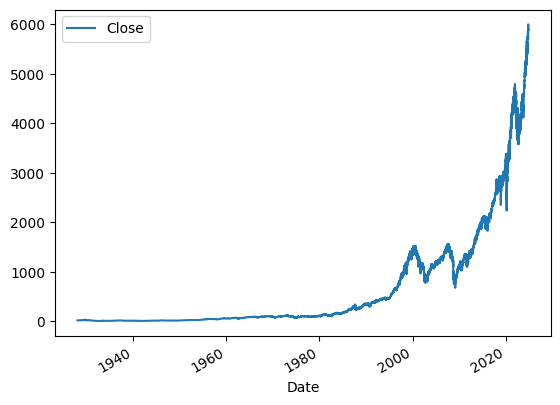

In [23]:
sp500.plot.line(y="Close", use_index = True)

In [24]:
del sp500['Dividends']
del sp500['Stock Splits']

In [29]:
#Shift one day to create column tomorrow
sp500["Tomorrow"] = sp500['Close'].shift(-1)

In [30]:
sp500["Target"]=(sp500["Tomorrow"] > sp500['Close']).astype(int)

In [31]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-11-12 00:00:00-05:00,6003.600098,6009.919922,5960.080078,5983.990234,4243400000,5985.379883,1
2024-11-13 00:00:00-05:00,5985.750000,6008.189941,5965.910156,5985.379883,4220180000,5949.169922,0
2024-11-14 00:00:00-05:00,5989.680176,5993.879883,5942.279785,5949.169922,4184570000,5870.620117,0


In [32]:
sp500 = sp500.loc["1990-01-01":].copy()

In [33]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-11-12 00:00:00-05:00,6003.600098,6009.919922,5960.080078,5983.990234,4243400000,5985.379883,1
2024-11-13 00:00:00-05:00,5985.750000,6008.189941,5965.910156,5985.379883,4220180000,5949.169922,0
2024-11-14 00:00:00-05:00,5989.680176,5993.879883,5942.279785,5949.169922,4184570000,5870.620117,0


## Training the Machine Learning Model

- I'm using Random Forest as this is a binary classification problem (0 for decrease, 1 for increase)

Note for Parameters:
- n_estimators: number of decision tree you want to train, the higher the better the accuracy
- min_samples_split: to avoid the overfitting, as this model tend to be overfit (if build the tree too deep), the higher we set the less accuracy but less overfit

In [38]:
#Baseline model
model = RandomForestClassifier(n_estimators=100, min_samples_split= 100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [40]:
#Does the model predict go up and it actually goes up ? 
preds = model.predict(test[predictors])

In [42]:
preds = pd.Series(preds, index = test.index)

In [44]:
precision_score(test['Target'], preds)

np.float64(0.7142857142857143)

In [45]:
combined = pd.concat([test['Target'], preds], axis =1)

<Axes: xlabel='Date'>

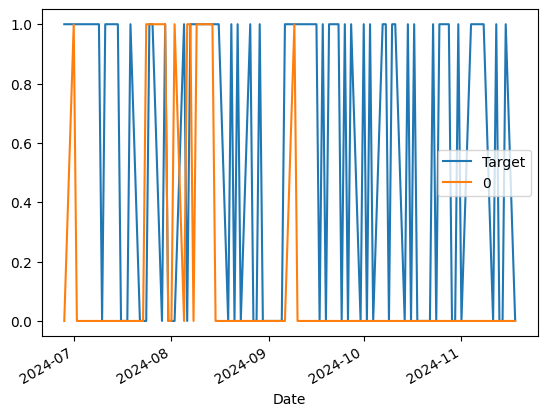

In [46]:
combined.plot()

## Building Backtesting

In [50]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name ="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [51]:
#Take 10 years of data, step = take 250 days
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test=data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [52]:
predictions = backtest(sp500, model, predictors)

In [53]:
predictions["Predictions"].value_counts()

Predictions
0    3661
1    2627
Name: count, dtype: int64

In [54]:
precision_score(predictions['Target'], predictions["Predictions"])

np.float64(0.5291206699657404)

In [ ]:
predictions["Target"].value_counts()/predictions.shape[0]

#Current the model is doing worser than the current real time data 52.9% vs 53.57%

Target
1    0.535782
0    0.464218
Name: count, dtype: float64

In [56]:
horizons = [2,5,60,250,1000]
new_predictors = []
for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"]/rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [58]:
sp500 = sp500.dropna()

In [59]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-11 00:00:00-05:00,6008.859863,6017.310059,5986.689941,6001.350098,4333000000,5983.990234,0,1.000484,2.0,1.010948,5.0,1.050171,34.0,1.143238,148.0,1.349436,529.0
2024-11-12 00:00:00-05:00,6003.600098,6009.919922,5960.080078,5983.990234,4243400000,5985.379883,1,0.998552,1.0,1.001236,4.0,1.045987,33.0,1.138640,147.0,1.344806,528.0
2024-11-13 00:00:00-05:00,5985.750000,6008.189941,5965.910156,5985.379883,4220180000,5949.169922,0,1.000116,1.0,0.999584,4.0,1.045048,34.0,1.137620,147.0,1.344385,529.0


## Improving the Model

In [60]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [61]:
#using predict_proba to get the Probability that the stock will go up or down
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index = test.index, name ="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [62]:
predictions = backtest(sp500, model, new_predictors)

In [63]:
predictions["Predictions"].value_counts()

Predictions
0.0    4440
1.0     847
Name: count, dtype: int64

In [64]:
precision_score(predictions["Target"], predictions["Predictions"])

np.float64(0.5749704840613932)

-> This is pretty good result as the stock went up 53% of the time (better than the baseline), and the model constraint is just a time series and historical price of the index

There are things that we can add to make the models better

## Future Improvement

- Adding news (articles, general economic conditions)
- Key stocks, sectors
- Looking at hourly, minutes data